In [1]:
import batterycharger as bc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

plt.style.use('seaborn')

In [2]:
charger1=bc.Charger(bc.Adaptor(power=90),bc.Battery(soc=0.8),psystem=50,imax=9.0)
bc.Battery(soc=.95).Ahr

6.756756756756756

###Description


> The purpose of this model 

>Battery charger size can be reduced by clamping the maximum output current.   
> The adaptor's full power can only be utilized when the battery voltage has reached Vbattmin  
> Full adaptor power is acheived when the system voltage is high enough so that


> We know that for a given adaptor power, the maximum charging current will be inversely proportional to the minimum system voltage,   
>>>$Icharge_{max}={Padaptor\over Vsystem_{min}}$ &emsp; &emsp; &emsp; (1)


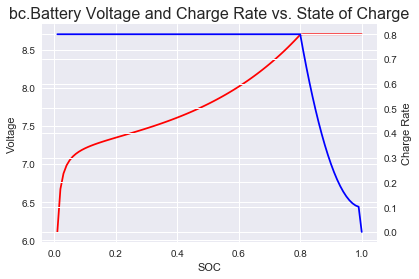

In [3]:
#@title
socvar = np.arange(.01,1.01,.01)
vbatlist = []
ibatlist = []
for i in socvar:
  vbatlist.append(bc.Battery(2,50,soc=i).voltage) 
  ibatlist.append(bc.Battery(2,50,soc=i).irate)
fig, ax1 = plt.subplots()

ax1.plot(socvar,vbatlist,color='r')
ax2 = ax1.twinx()

ax2.plot(socvar,ibatlist,color='b')

ax1.set_xlabel('SOC')
ax1.set_ylabel('Voltage')
ax2.set_ylabel('Charge Rate')
plt.title("bc.Battery Voltage and Charge Rate vs. State of Charge" , fontsize=16)
plt.show()

In [13]:
ichargermax=7.5
padaptor=60


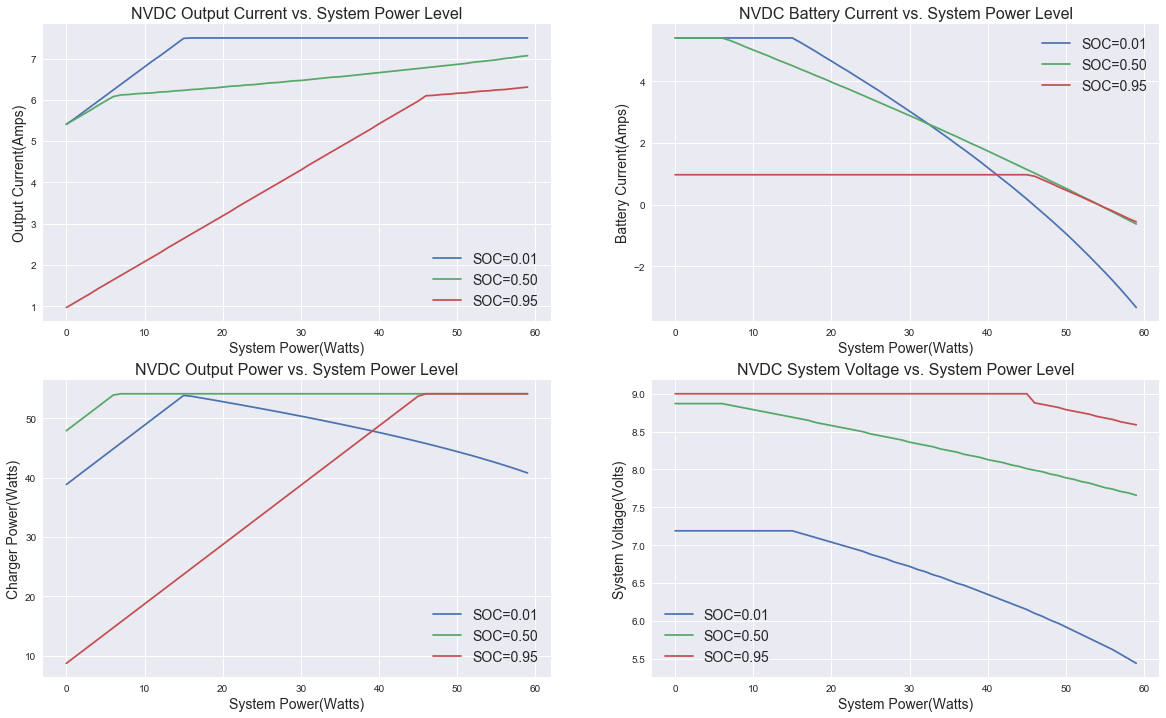

In [14]:
#@title
soclist = [0.01, 0.5, 0.95]
syspwr = np.arange(0,60,1)
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
  
for s in soclist:
  chargercurrent = []
  batterycurrent = []
  chargerpower = []
  chargervoltage = []
  for p in syspwr:
    chargercurrent.append(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=p, imax=ichargermax).iout) 
    batterycurrent.append(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=p, imax=ichargermax).icharge)
    chargerpower.append(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=p, imax=ichargermax).pout) 
    chargervoltage.append(bc.Charger(bc.Adaptor(padaptor,20),bc.Battery(2,50,soc=s),psystem=p, imax=ichargermax).vsys)
  ax1.plot(syspwr,chargercurrent,label="SOC=%3.2f" % (s))
  ax2.plot(syspwr,batterycurrent,label="SOC=%3.2f" % (s))
  ax3.plot(syspwr,chargerpower,label="SOC=%3.2f" % (s))
  ax4.plot(syspwr,chargervoltage,label="SOC=%3.2f" % (s))
ax1.set_xlabel("System Power(Watts)", size=14)
ax1.set_ylabel("Output Current(Amps)", size=14)
ax1.set_title("NVDC Output Current vs. System Power Level" , fontsize=16)
ax1.legend(ncol=1, loc='lower right', fontsize=14)
ax2.set_xlabel("System Power(Watts)", size=14)
ax2.set_ylabel("Battery Current(Amps)", size=14)
ax2.set_title("NVDC Battery Current vs. System Power Level" , fontsize=16)
ax2.legend(ncol=1, loc='upper right', fontsize=14)
ax3.set_xlabel("System Power(Watts)", size=14)
ax3.set_ylabel("Charger Power(Watts)", size=14)
ax3.set_title("NVDC Output Power vs. System Power Level" , fontsize=16)
ax3.legend(ncol=1, loc='lower right', fontsize=14)
ax4.set_xlabel("System Power(Watts)", size=14)
ax4.set_ylabel("System Voltage(Volts)", size=14)
ax4.set_title("NVDC System Voltage vs. System Power Level" , fontsize=16)
ax4.legend(ncol=1, loc='lower left', fontsize=14)

plt.show()

In [15]:
charger=bc.Charger(bc.Adaptor(60,20),bc.Battery(2,50,soc=.01),psystem=0, imax=7.5)
round(charger.ichargemax,2)

5.41

In [16]:
batstate_array=bc.batterystate_vs_t(charger)
round(max(batstate_array[0]),2)

2.3

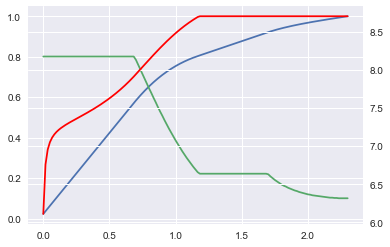

In [17]:
fig, ax1 = plt.subplots()


ax1.plot(batstate_array[0],batstate_array[1])
ax1.plot(batstate_array[0],batstate_array[3])
ax2 = ax1.twinx()
ax2.plot(batstate_array[0],batstate_array[2], color='red')
plt.show()


> When the NB is off, all of the adaptor power is directed toward charging the battery and charger current is limited by the EC

> When the NB is on, the EC may need to throttle the system to keep the charger current within design specs.   


###Parameters

###Results

### Graphs

In [9]:
print('hello')

hello
